# Software Engineering Conferences' Fees

This project aims at displaying the trends of fees for several major software engineering conferences.

## Methodology

Registration fees are recorded over the years in a CSV file, and a Python script produces charts exhibiting the trends.

We record the fees for the full conference, for an IEEE or ACM non-member with early registration. If it is possible for an author to present virtually, we retain the virtual registration fees. The rationale for these choices is that this is the minimum fee arbitrary researchers must pay to present their papers. All fees are converted in euros, as converted on June 4, 2014, for conferences before June 2014 and using the exchange rate at the time of the introducing commit for conferences after June 2014.

At the moment, we observe the following conferences:

* ICSM/ICSME
* ASE
* ICSE
* ESEC/FSE

We still have some missing values, so if you know the missing fees, please contact us. Additionally, there might be mistakes so do not hesitate to post an issue or make a pull request if you think this is the case.

## Libraries

In [1]:
import plotnine as pn
import pandas as pd
import warnings

warnings.filterwarnings( "ignore", module = "plotnine.*" )

## Loading data

In [2]:
fees = pd.read_csv('se_prices.csv')
fees.head()

,conference,year,early_regular,early_student
0,ICSME,2010,500.0,200.0
1,ICSME,2011,NaN,NaN
2,ICSME,2012,587.0,293.0
3,ICSME,2013,699.0,400.0
4,ICSME,2014,772.0,521.0


In [3]:
LIMIT = 10 # number of displayed years (-1 if all)

In [4]:
years = list(range(min(fees['year']), max(fees['year']) + 1))
if LIMIT != -1 and len(years) > LIMIT:
    years = years[-LIMIT:]
display(str(years))

'[2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023, 2024]'

## Functions

In [5]:
def plot_fees(fees, title, y_axis, years, filename):
    p = pn.ggplot(fees, pn.aes('year', y_axis, color = 'conference', shape = 'conference')) + \
        pn.geom_point() + \
        pn.geom_line() + \
        pn.labs(title = title, x = 'Year', y = 'Fee (€)') + \
        pn.ylim(0, 1200) + \
        pn.theme_light() + \
        pn.theme(axis_text_x = pn.element_text(rotation = 90)) + \
        pn.scale_x_continuous(limits=(min(years), max(years)), breaks = years) + \
        pn.scale_colour_discrete(name = 'Conference') + \
        pn.scale_shape_discrete(name = 'Conference')
    return p

## Plots

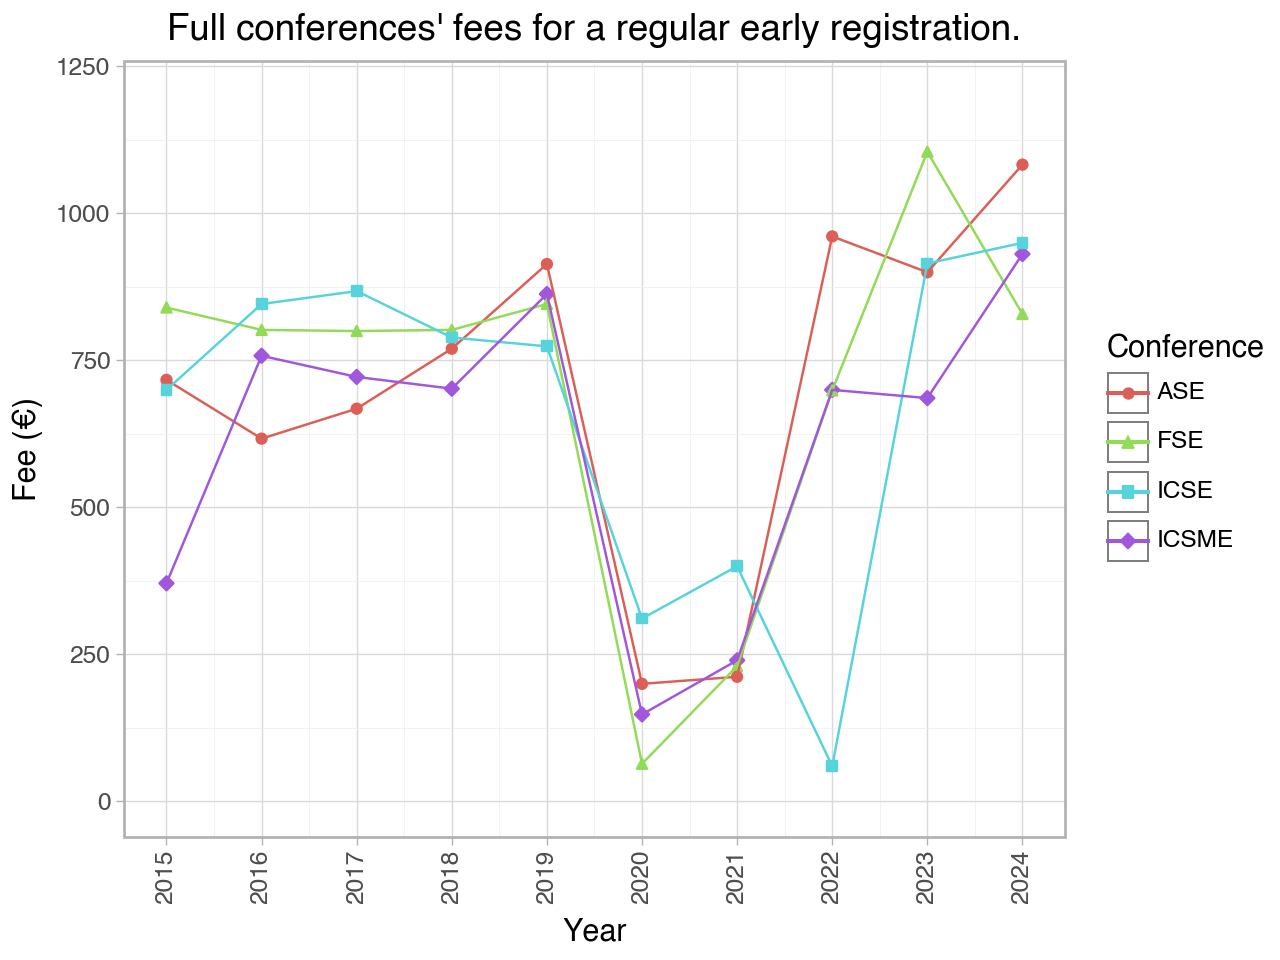

In [6]:
p = plot_fees(fees, 'Full conferences\' fees for a regular early registration.', 'early_regular', years, 'se_prices_reg.png')
p.save("se_prices_reg.png", width = 6, height = 3, dpi=300)
p

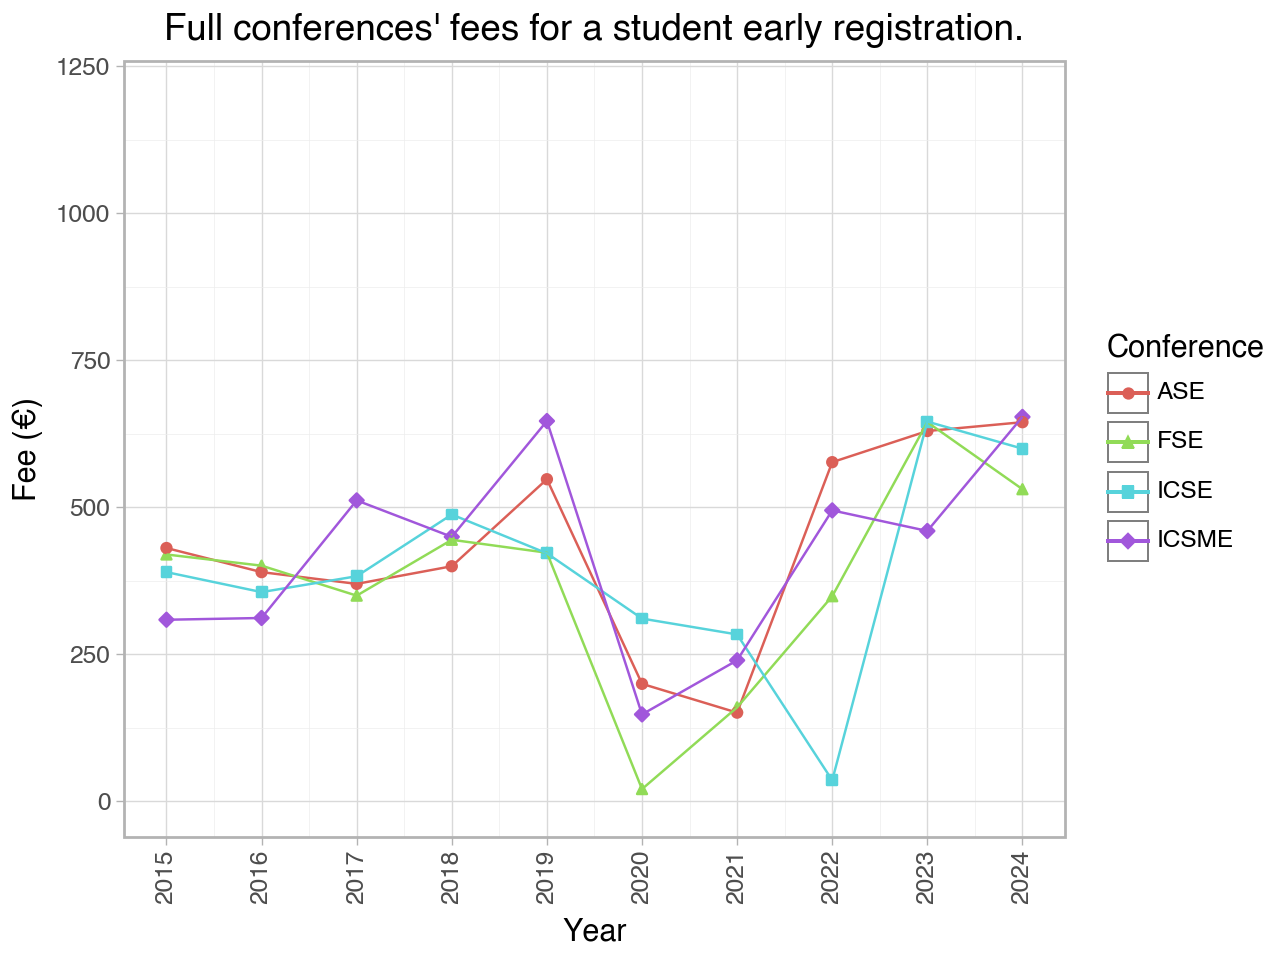

In [7]:
p = plot_fees(fees, 'Full conferences\' fees for a student early registration.', 'early_student', years, 'se_prices_stu.png')
p.save("se_prices_stu.png", width = 6, height = 3, dpi=300)
p